# Cu-F



In [1]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [2]:
# Directory where we keep our analysis code
project_dir = os.path.expanduser('~/git/nh3-analysis/jan2023/')

# Upper-level data directory for the time-resolved data
data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-F-Expt-9'

# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-29196/shared/autoreduce/'

# Directory with steady-state fit results
#fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting'
fit_dir = os.path.expanduser('~/reflectivity_fits/IPTS-29196')

# Directory where the dynamic data and fit results are. 
dyn_data_dir = os.path.join(data_dir, '15s')
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-15s-fwd'
dyn_fit_dir_2 = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-15s-bck'


## Summary of 60 Hz data

Processing: /SNS/users/m2d/reflectivity_fits/IPTS-29196/201341/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-29196/201341/__model.py
Z offset = -158.36;    Z_max = 850.9
Too many points: pruning down
MC file read: 0.0017066001892089844 sec
Done 0.5424714088439941 sec
Processing: /SNS/users/m2d/reflectivity_fits/IPTS-29196/201349/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-29196/201349/__model.py
Z offset = -346.79;    Z_max = 1316.2
Too many points: pruning down
MC file read: 0.004899263381958008 sec
Done 1.2417895793914795 sec
Processing: /SNS/users/m2d/reflectivity_fits/IPTS-29196/201357/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-29196/201357/__model.py
Z offset = -487.096;    Z_max = 1535.8
Too many points: pruning down
MC file read: 0.003361940383911133 sec
Done 1.175426721572876 sec


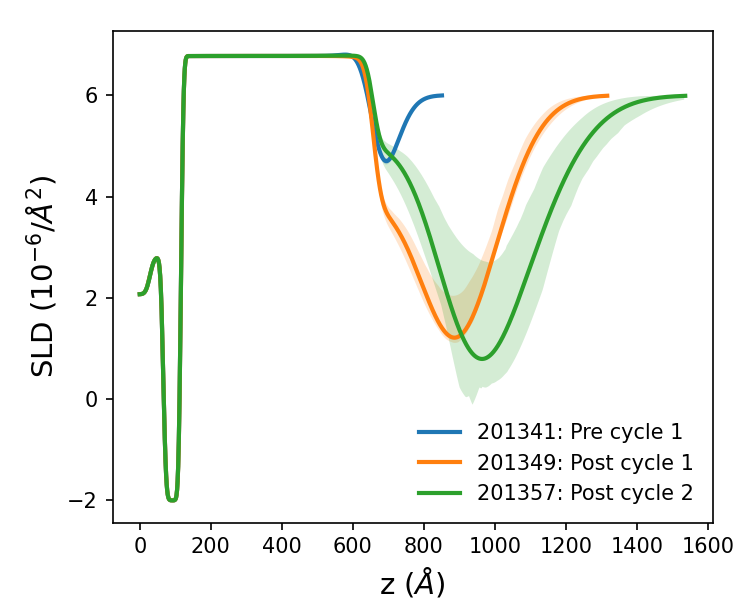

In [3]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(201341, "201341: Pre cycle 1", fit_dir=fit_dir, show_cl=True)
summary_plots.plot_sld(201349, "201349: Post cycle 1", fit_dir=fit_dir, show_cl=True)
summary_plots.plot_sld(201357, "201357: Post cycle 2", fit_dir=fit_dir, show_cl=True)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


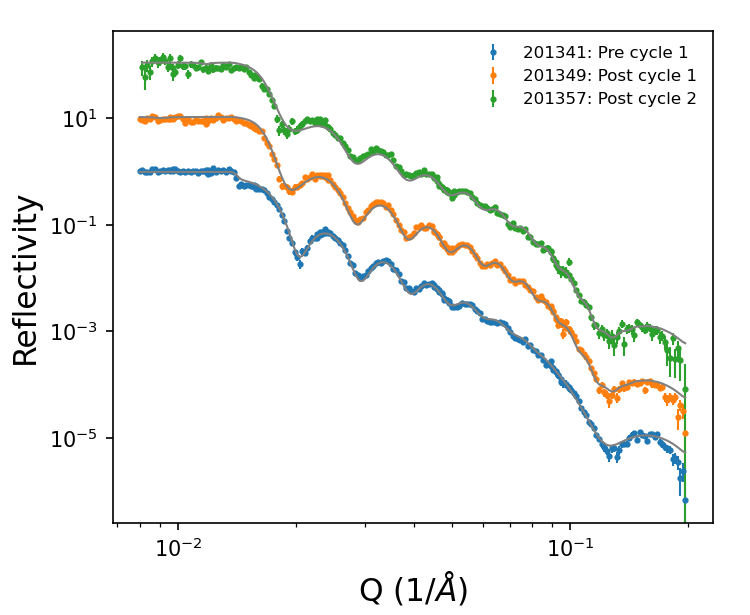

In [5]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(201341, '201341: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201349, '201349: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201357, '201357: Post cycle 2', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


130


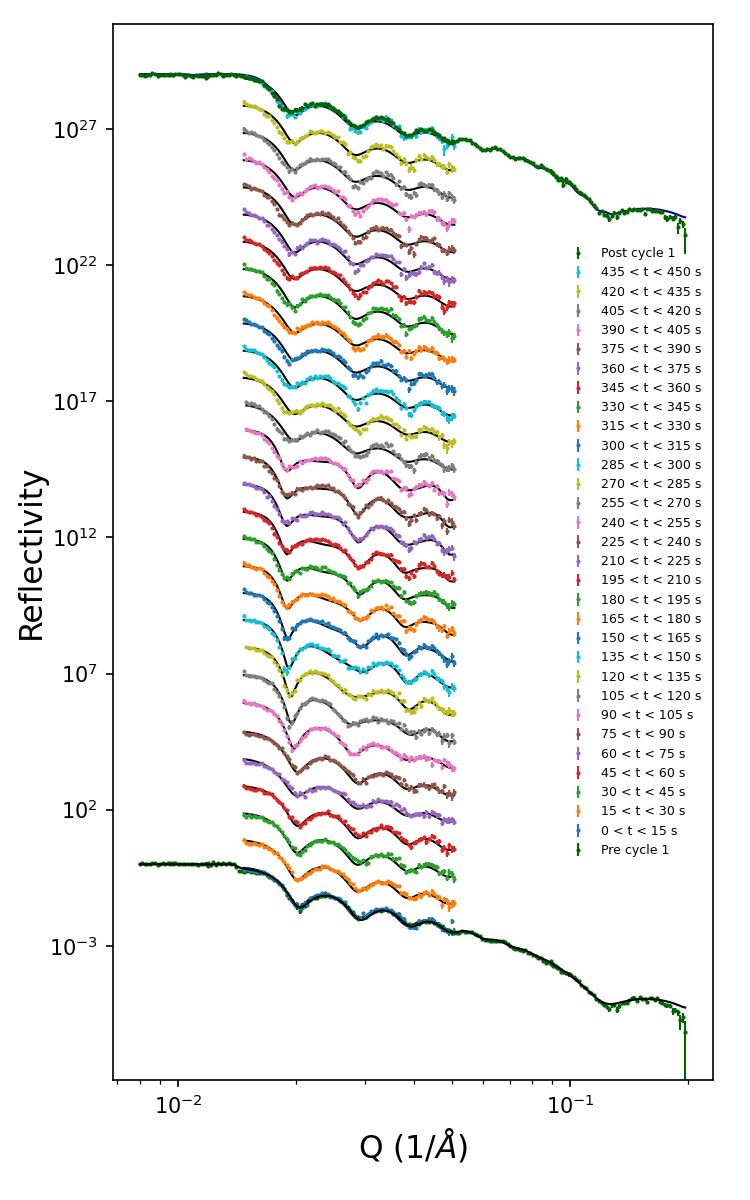

In [240]:
importlib.reload(summary_plots)

dynamic_run = 201348 # Cycle 1


summary_plots.plot_dyn_data(dynamic_run, 201341, 201349, first_index=0, last_index=30, delta_t=15, model_name='model-loop-201348',
                            fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

# Forward

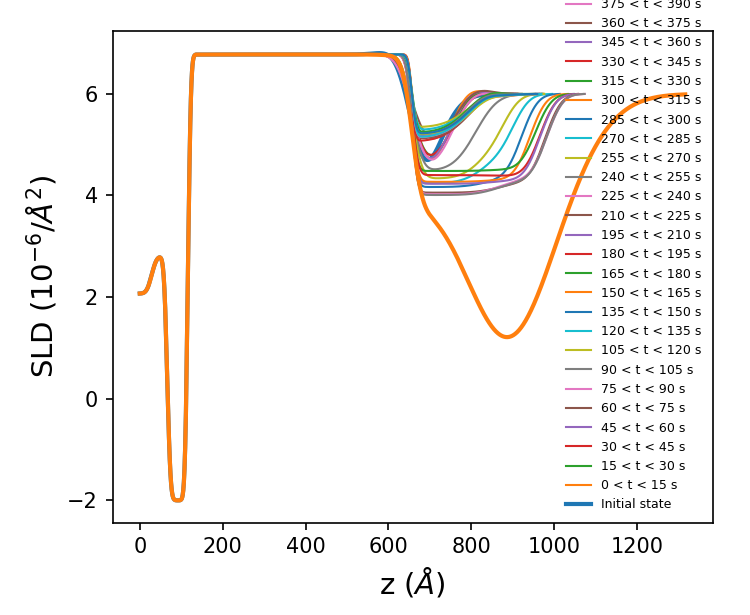

In [215]:
importlib.reload(summary_plots)

_file_list = sorted(os.listdir(dyn_data_dir))

# Get only the files for the run we're interested in
first = 0
last = 30
_good_files = []
for _f in _file_list:
    if _f.startswith('r%d_t' % dynamic_run):
        a, _ = os.path.splitext(_f)
        t = int(a[-6:])
        _good_files.append([t, a, a])


_good_files = _good_files[first:last]

model_file = os.path.join(project_dir, 'dyn-fitting', '201348-dyn-model.py')

summary_plots.plot_dyn_sld(_good_files, 201341, 201349, delta_t=15,
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                           model_name='model-loop-201348', model_file=model_file, show_cl=False)

# Backward

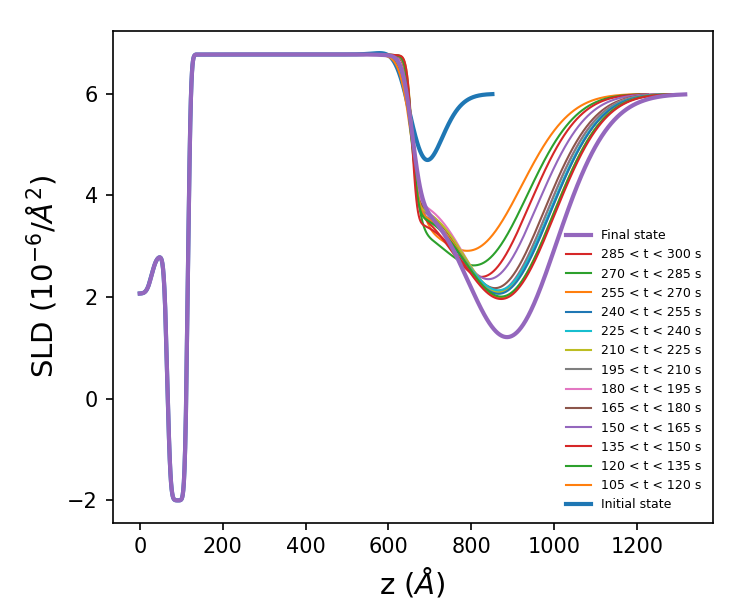

In [226]:
summary_plots.plot_dyn_sld(_good_files[7:20], 201341, 201349, delta_t=15,
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir_2, 
                           model_name='model-loop-201348', model_file=model_file, show_cl=False)

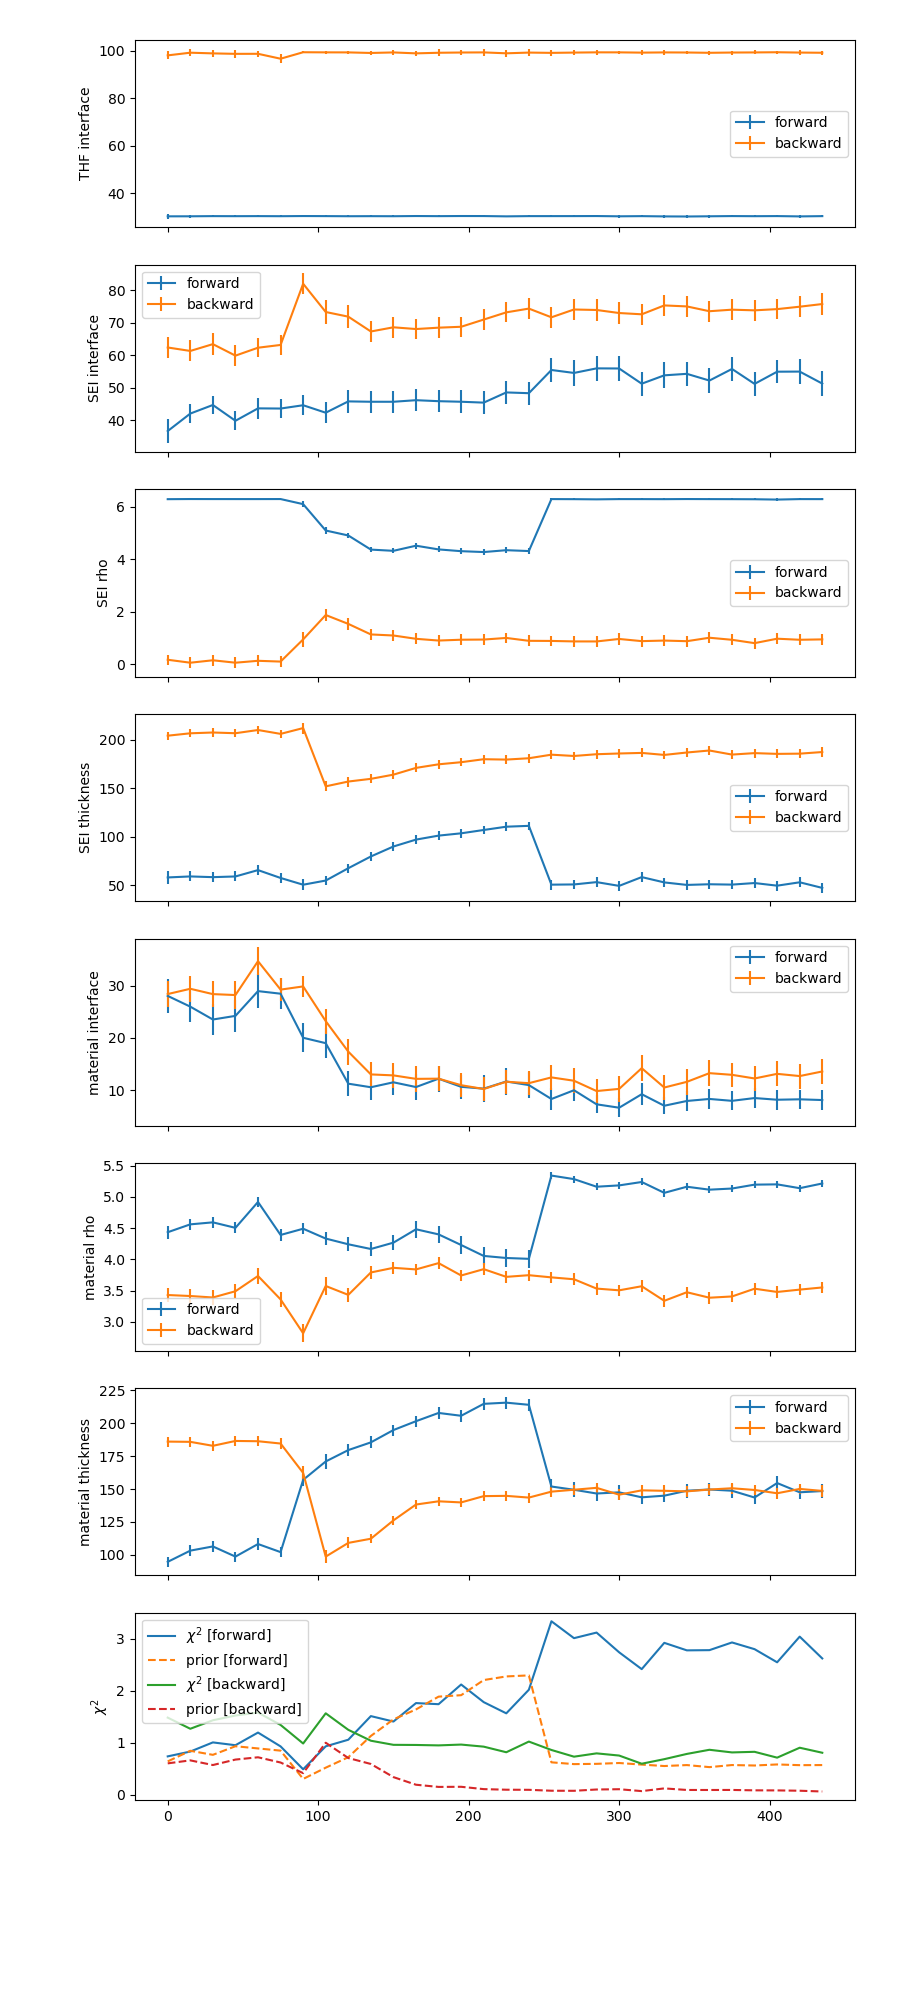

In [237]:
importlib.reload(summary_plots)

summary_plots.trend_data(_good_files, None, 201290, label='forward',
                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                         model_name='model-loop-201348', model_file=model_file)

if True:
    dyn_fit_dir_2 = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-15s-bck'
    summary_plots.trend_data(_good_files, None, 201290, label='backward',
                             fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir_2, 
                             model_name='model-loop-201348', model_file=model_file, newplot=False)


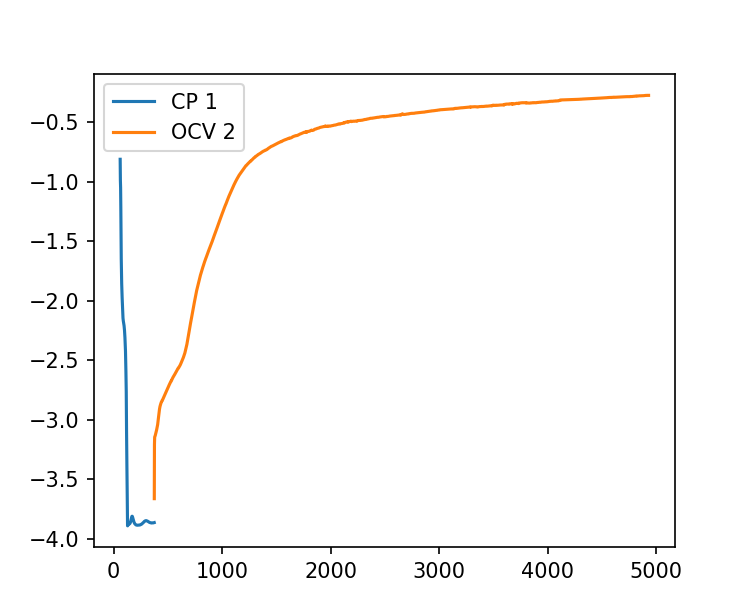

In [199]:
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))

ec_cp1 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt9_Summary_CP1.txt'), delimiter=',', skiprows=1).T
plt.plot(ec_cp1[0], ec_cp1[1], label='CP 1')

#ec_cp2 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_CP2.txt'), delimiter=',', skiprows=1).T
#plt.plot(ec_cp2[0], ec_cp2[1], label='CP 2')
         
ec_ocv2 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt9_Summary_OCV2.txt'), delimiter=',', skiprows=1).T
plt.plot(ec_ocv2[0], ec_ocv2[1], label='OCV 2')
         
#ec_ocv3 = np.loadtxt(os.path.join(project_dir, 'ec-data', 'Expt6_Summary_OCV3.txt'), delimiter=',', skiprows=1).T
#plt.plot(ec_ocv3[0], ec_ocv3[1], label='OCV 3')
plt.legend()